# Police Dataset
- Instruction (For Data Cleaning)
    1. Remove the column that only contains missing values
    2. For Speeding, were Men or Women stopped more often?
    3. Does gender affect who gets searched during a stop?
    4. What is the mean stop_duration?
    5. Compare the age distributions for each violation

# 1. Remove the column that only contains missing values

In [3]:
import pandas as pd
import numpy as np

In [4]:
police = pd.read_csv(r'./data/3. Police Data.csv')
police

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,NaN,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,NaN,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,NaN,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [5]:
police.columns

Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [6]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

- country_name 전부 결측
- stop_date, stop_time, search_conducted, drugs_related_stop 빼고 전부 결측이 있음 -> 비슷하게 빠진 결측이 있어서 그림으로 그려봐야 할 듯
- search_type는 삭제해야하는지 여부 확인
- 각 변수별 연관성 확인 + 변수의 의미 파악 필요

In [7]:
police2 = police.drop(columns = 'country_name')
police2

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


# 2. For Speeding, were Men or Women stopped more often?

In [8]:
police2.loc[police['violation']=='Speeding', 'driver_gender'].value_counts()

M    25517
F    11686
Name: driver_gender, dtype: int64

# 3. Does gender affect who gets searched during a stop?

In [9]:
police2.groupby('search_conducted')['driver_gender'].value_counts()

search_conducted  driver_gender
False             M                43051
                  F                15944
True              M                 2113
                  F                  366
Name: driver_gender, dtype: int64

# 4. What is the mean stop_duration?

In [10]:
police2['stop_duration'].value_counts()

0-15 Min     47379
16-30 Min    11448
30+ Min       2647
2                1
Name: stop_duration, dtype: int64

In [11]:
police2['stop_duration_num'] = police2['stop_duration'].map({'0-15 Min' : 7.5, '16-30 Min' : 22.5, '30+ Min ' : 45, '2' : 7.5})
police2['stop_duration_num'].mean()

10.419018154620248

# 5. Compare the age distributions for each violation

In [12]:
police2['violation'].value_counts()

Speeding               37204
Moving violation       11926
Equipment               6516
Other                   3583
Registration/plates     2243
Seat belt                  3
Name: violation, dtype: int64

In [13]:
police2.groupby('violation')['driver_age'].describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0


- 데이터가 의미하는 것을 파악해야할 것 -> 이 데이터로 할 수 있는 목표 찾기
- 전체적으로 시각화가 필요할 것 같다.
- 단순 코드 연습만 되는 것 같은 느낌

# 추가 분석

- 순찰하면서 정지시킨 운전자들에 대한 데이터  
stop_date  - 정지시킨 날짜  
stop_time - 정지시킨 시간  
country_name - 나라  
driver_gender - 성별  
driver_age_raw - 출생년도  
driver_age - 나이  
driver_race - 인종  
violation_raw - 위반 법  
violation - 위반  
search_conducted - 검색여부(뭐에 대한??)  
search_type - 검색 유형(검색에 대한 정당화, 동의한 경우 'Consent')  
stop_outcome - 정지 결과   
is_arrested - 체포 여부  
stop_duration - 세워둔 시간  
drugs_related_stop - 약 관련 정지

- 관련 주제 : 
    1. 전체적인 시각화 그래프

# 1. EDA
### 1-1. 결측치 확인 및 제거

In [14]:
import seaborn as sns
from datetime import timedelta

In [15]:
police.isna().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

- 결과  
country_name 삭제, search_conducted 삭제  
나머지 4060은 겹치는 값인지 파악

<AxesSubplot:>

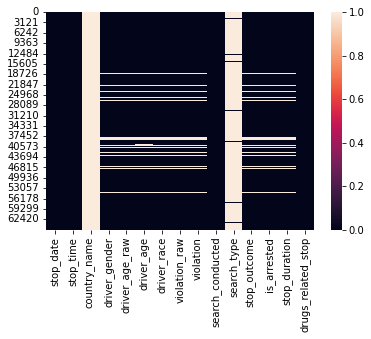

In [16]:
sns.heatmap(police.isna(), cbar='black')

- 결과  
동일한 곳이 빠지고 있다, gender, driver_age는 추가로 더 빠짐 (추측할 수 있는 조건이 너무 적기에 제거)

In [17]:
police3 = police.drop(['country_name','search_type'], axis=1)
police3 = police3[police3['driver_age'].isna() == False]
police3 = police3[police3['driver_gender'].isna() == False]
police3

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65529,12/6/2012,16:00,M,1994.0,18.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
65530,12/6/2012,17:54,F,1987.0,25.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,M,1954.0,58.0,White,Speeding,Speeding,False,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,Citation,False,0-15 Min,False


In [18]:
police3.isna().sum()

stop_date             0
stop_time             0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64

- 결과  
결측 제거 완료

### 1-2. 이상치 파악 및 처리

In [19]:
police3.describe()

,driver_age_raw,driver_age
count,61222.000000,61222.000000
mean,1974.619108,34.149603
std,12.845322,12.760965
min,1918.000000,15.000000
25%,1966.000000,23.000000
50%,1978.000000,31.000000
75%,1985.000000,43.000000
max,1996.000000,88.000000


In [33]:
# 각 변수의 이름을 data명으로 value_counts 값 dataframe으로 출력
freq_dataframe=pd.DataFrame(columns=['columns','levels','counts'])
for idx, val in enumerate(police3.columns):
    for i in range(len(police3[val].value_counts())):
        freq_dataframe.loc[len(freq_dataframe)]=[val,police3[val].value_counts().index[i], police3[val].value_counts().values[i]]
groups = freq_dataframe.groupby(freq_dataframe['columns'])

for idx, val in enumerate(police3.columns):
    try :
        globals()['freq_{}'.format(val)] = groups.get_group(val)
    except :
        print('값 없는 변수 : ',val)

In [34]:
freq_stop_time

,columns,levels,counts
2650,stop_time,10:00,264
2651,stop_time,11:00,257
2652,stop_time,10:30,237
2653,stop_time,9:00,237
2654,stop_time,9:30,229
...,...,...,...
4073,stop_time,4:55,1
4074,stop_time,5:09,1
4075,stop_time,5:31,1
4076,stop_time,4:48,1


- 결과  
stop_date, stop_time : 시간대 별로 날짜별로 구분해야 할 듯  
gender : 보아 남자가 여자의 4배정도 많음  
driver_age_raw : age와 겹쳐서 age랑 나이대로 변수 두 개로 파악하는게 좋을 듯  
driver_race : 백인이 다른 인종 대비 많음  
violation_raw, violation : speeding이 반이상을 차지, 둘 중 하나만 사용해도 될 듯(중분류, 대분류)  
search_conducted : False가 대부분인데 변수 자체가 뭔지 모름  
stop_outcome : Citation이 대부분을 차지 (pass인지 아닌지로 구분해야할 듯)  
is_arrested : False가 대부분  
stop_duration : 2라고 표시된 것을 어떻게 구분할 것인가가 중요(2hours? 2min?), 15min 이하가 제일 많음  
drugs_related_stop : True가 적긴하지만 중요한 내용일 것 같음

### 1-3. EDA
#### 1-3-1. stop_date

In [ ]:
# stop_date_freq 생성
stop_date_freq = pd.DataFrame(police3['stop_date'].value_counts()).reset_index()
stop_date_freq.rename(columns = {'index' : 'date', 'stop_date' : 'count'}, inplace = True)

# 날짜를 datetime 형식으로 변경 & 정렬
stop_date_freq['date'] = pd.to_datetime(stop_date_freq['date'])
stop_date_freq.sort_values(by='date', ascending=True, inplace=True)

print(stop_date_freq)

           date  count
2624 2005-01-02      1
2647 2005-01-18      1
2627 2005-01-23      1
2628 2005-02-20      1
2629 2005-03-14      1
...         ...    ...
1928 2012-12-03     18
951  2012-12-04     25
1954 2012-12-05     17
571  2012-12-06     30
2649 2012-12-07      1

[2650 rows x 2 columns]


<AxesSubplot:xlabel='date'>

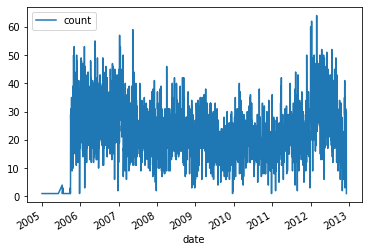

In [ ]:
stop_date_freq.plot(x='date', y='count')

- 결과  
날짜로 봐서는 알 수 없음, 월, 년 별로 봐야할 듯

In [ ]:
stop_date_freq['month'] = stop_date_freq['date'].dt.month
stop_date_freq['year'] = stop_date_freq['date'].dt.year

<AxesSubplot:xlabel='month'>

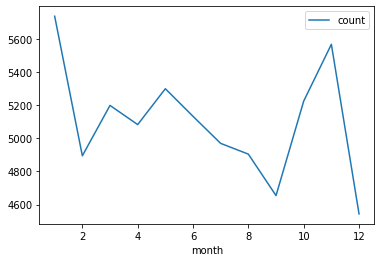

In [ ]:
stop_date_freq.groupby('month').sum().reset_index().plot('month','count')

- 결과  
2월 9월 12월에 낮은 편  
1월 11월에 높은 편  
    -> 이유는 무엇일까? 적을 때와 많을 때는 어떤 룰을 많이 어겼을까?

<AxesSubplot:xlabel='year'>

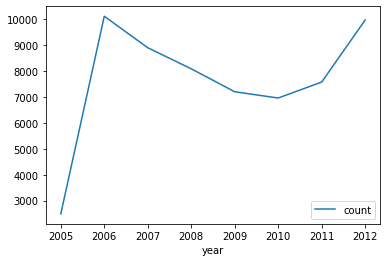

In [ ]:
stop_date_freq.groupby('year').sum().reset_index().plot('year','count')

- 결과  
2005년엔 낮은 편이었다.(아마 기록 시작이라 그럴 것 같다고 예상중) 2006년 급격히 증가했으며 2010년까지 감소되다가 다시 증가하는 추세이다.